# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (12, 9)

In [4]:
df = pd.read_excel('geo.xlsx')

In [5]:
df1 = df.drop(['comment_class'], axis=1)

In [6]:
from sklearn.cluster import KMeans

In [7]:
model = KMeans(n_clusters=8)

In [8]:
df1['cluster'] = model.fit_predict(df1)

In [9]:
df1['comment_class'] = df['comment_class']

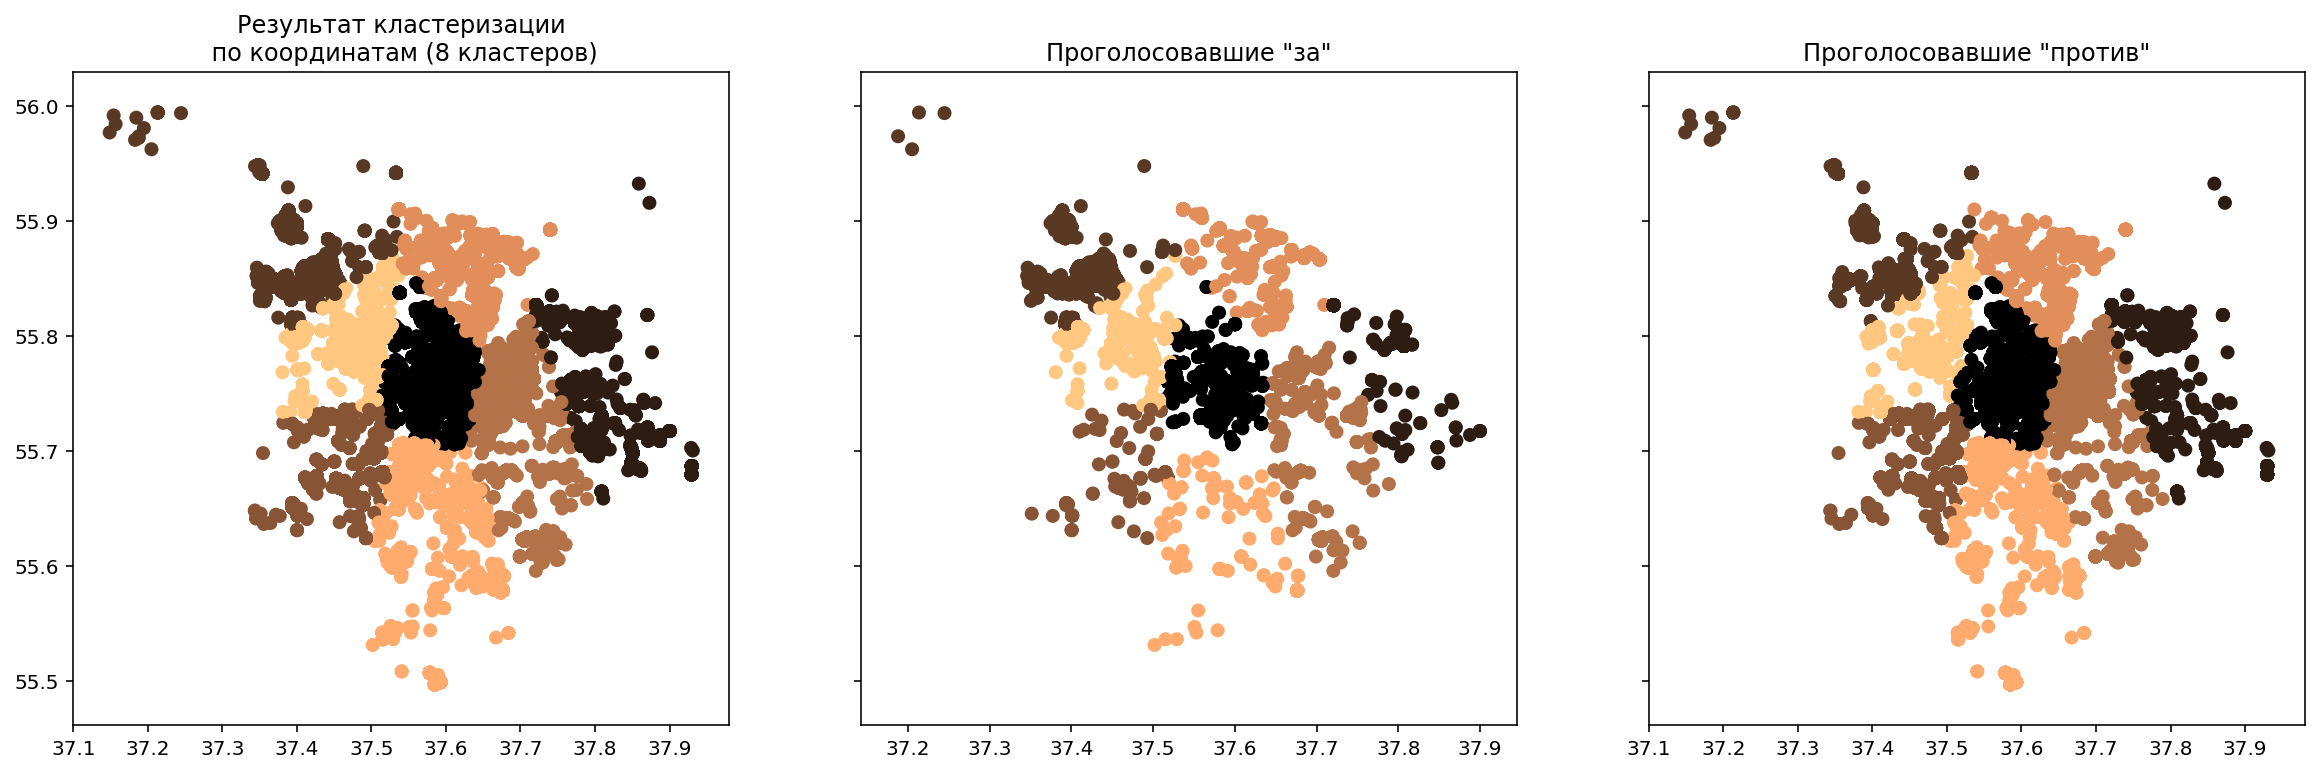

In [10]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(20, 6))
ax1.scatter(df1['x'], df1['y'], c=df1['cluster'], cmap='copper')
ax1.set_title('Результат кластеризации\n по координатам (8 кластеров)')
ax2.scatter(df1.loc[df1['comment_class'] == 1]['x'], df1.loc[df1['comment_class'] == 1]['y'], c=df1.loc[df1['comment_class'] == 1]['cluster'], cmap='copper')
ax2.set_title('Проголосовавшие "за"')
ax3.scatter(df1.loc[df1['comment_class'] == -1]['x'], df1.loc[df1['comment_class'] == -1]['y'], c=df1.loc[df1['comment_class'] == -1]['cluster'], cmap='copper')
ax3.set_title('Проголосовавшие "против"')

# Найдем оптимальное количество кластеров для KMeans

In [11]:
k_inertia = []
ks = range(1,20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(df1)
    k_inertia.append(clf_kmeans.inertia_)

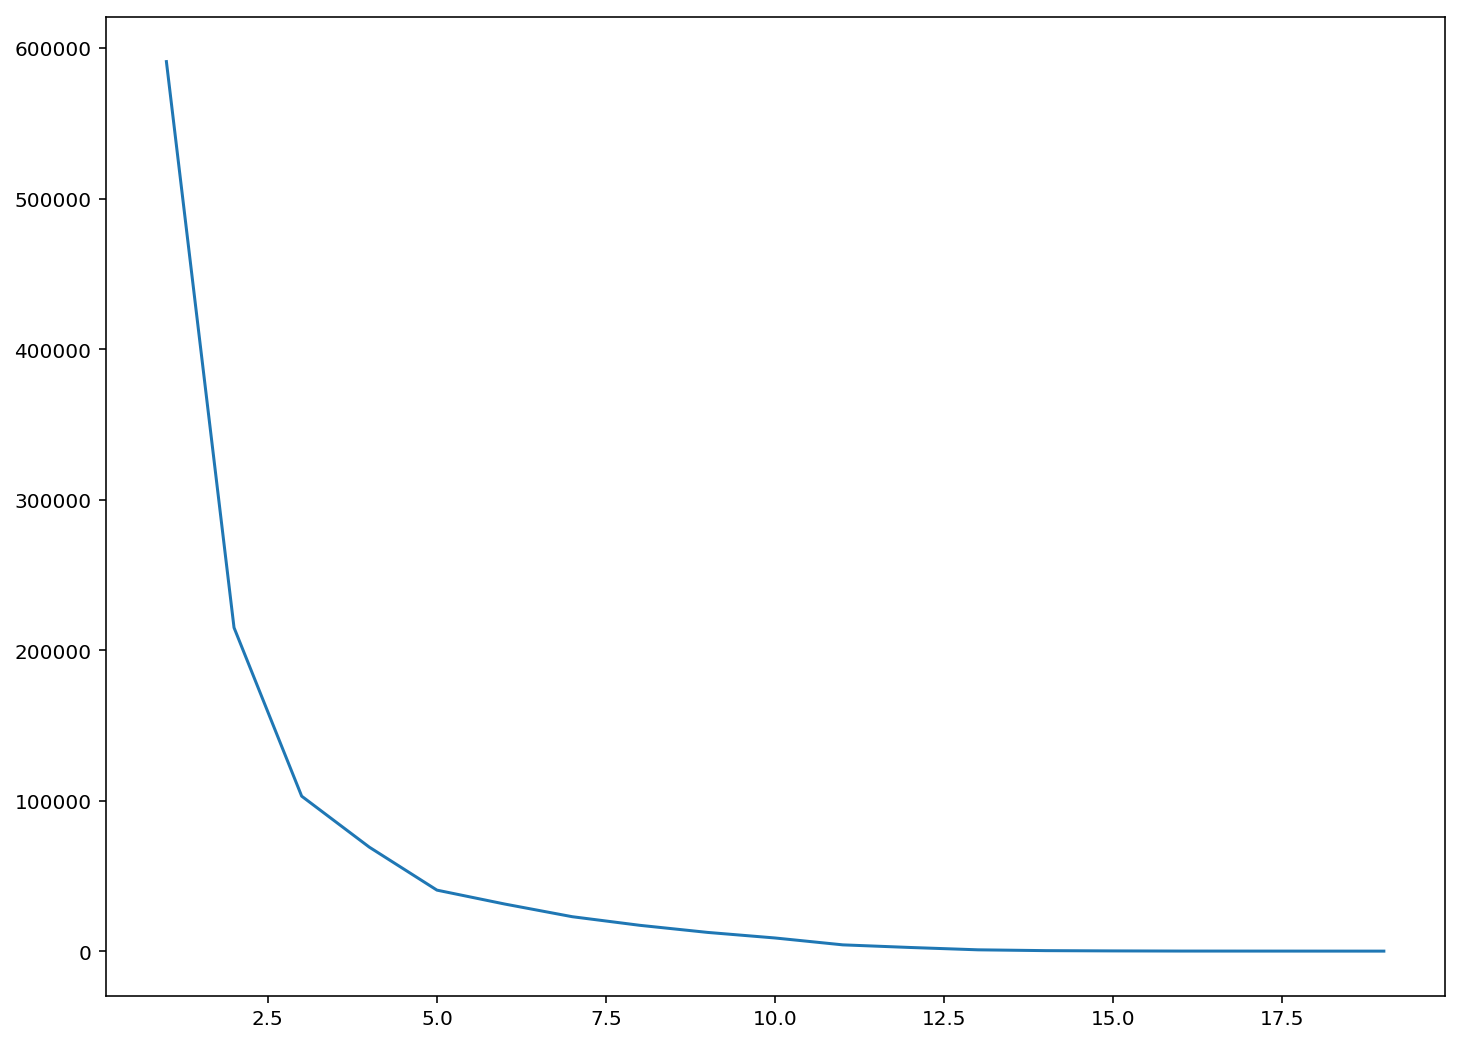

In [12]:
plt.plot(ks, k_inertia)

In [13]:
diff = np.diff(k_inertia)

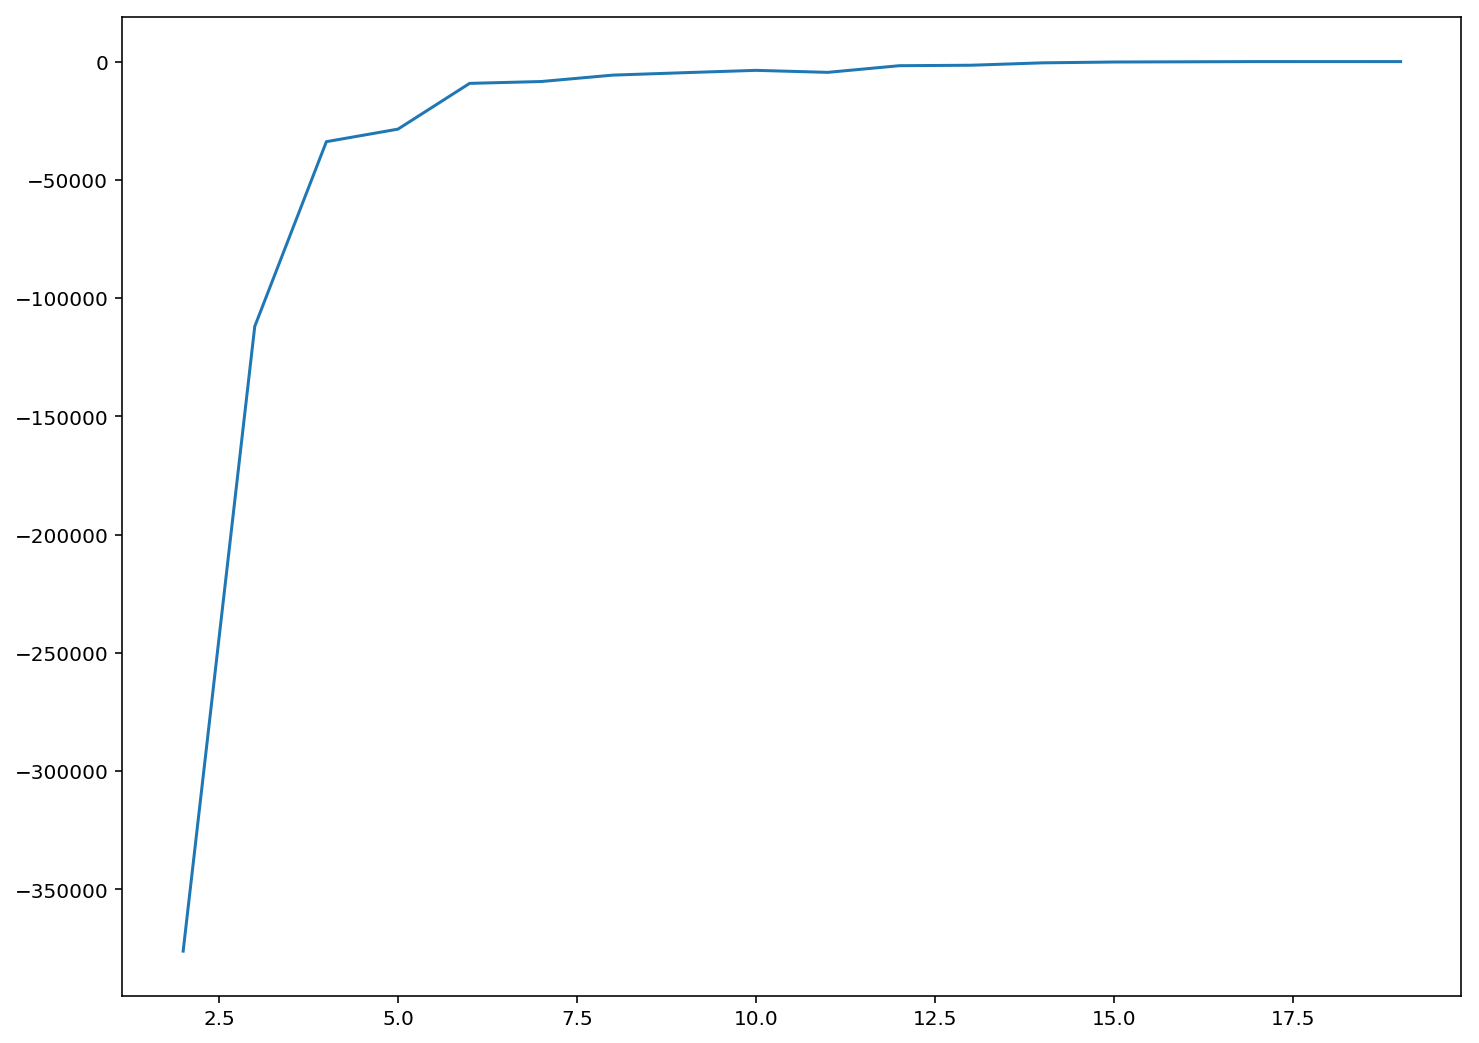

In [14]:
plt.plot(ks[1:], diff)

In [15]:
diff_r = diff[1:] / diff[:-1]

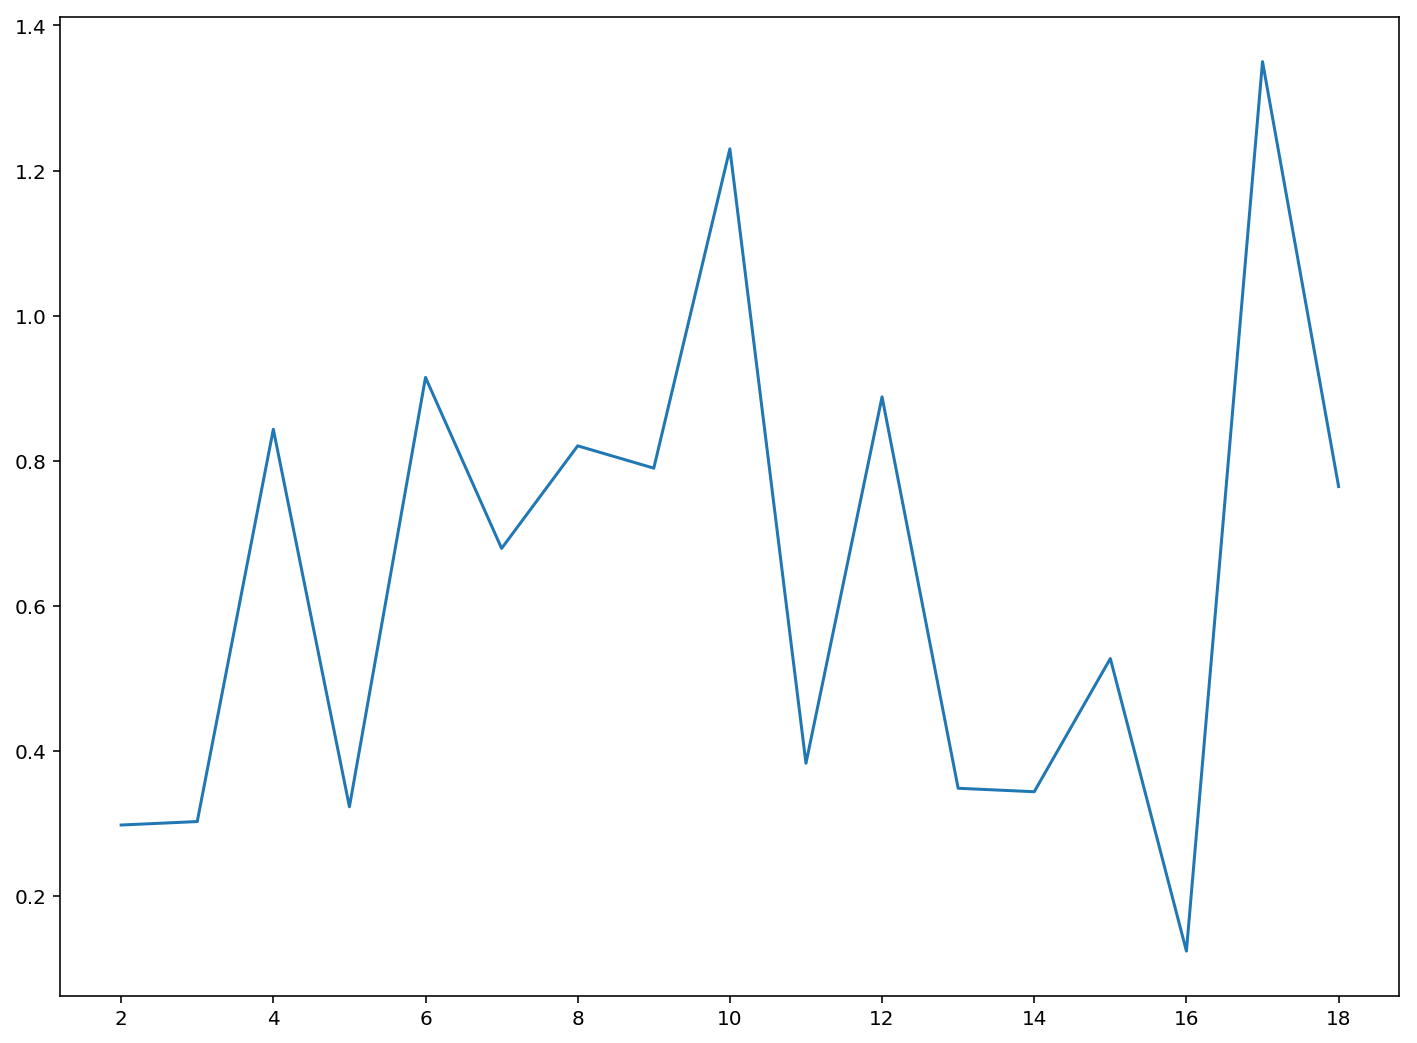

In [16]:
plt.plot(ks[1:-1], diff_r)

In [17]:
k_opt = ks[np.argmin(diff_r)+1]
k_opt

16

# Находим наиболее активные в голосовании районы

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
stsc = StandardScaler()

In [28]:
df_smp = df.drop(['comment_class'], axis=1).sample(frac=0.1)

In [38]:
columns = df_smp.columns
df_sample = stsc.fit_transform(df_smp)
df_sample = pd.DataFrame(df_sample, columns = columns)
df_sample.head()

,x,y
0,-0.437834,0.448101
1,1.958333,0.477358
2,0.969206,1.472896
3,1.877748,0.583006
4,-1.362077,-1.730824


In [39]:
from sklearn.cluster import DBSCAN

In [40]:
eps_list = [0.0001, 0.001, 0.01, 0.1, 1]
eps_list

[0.0001, 0.001, 0.01, 0.1, 1]

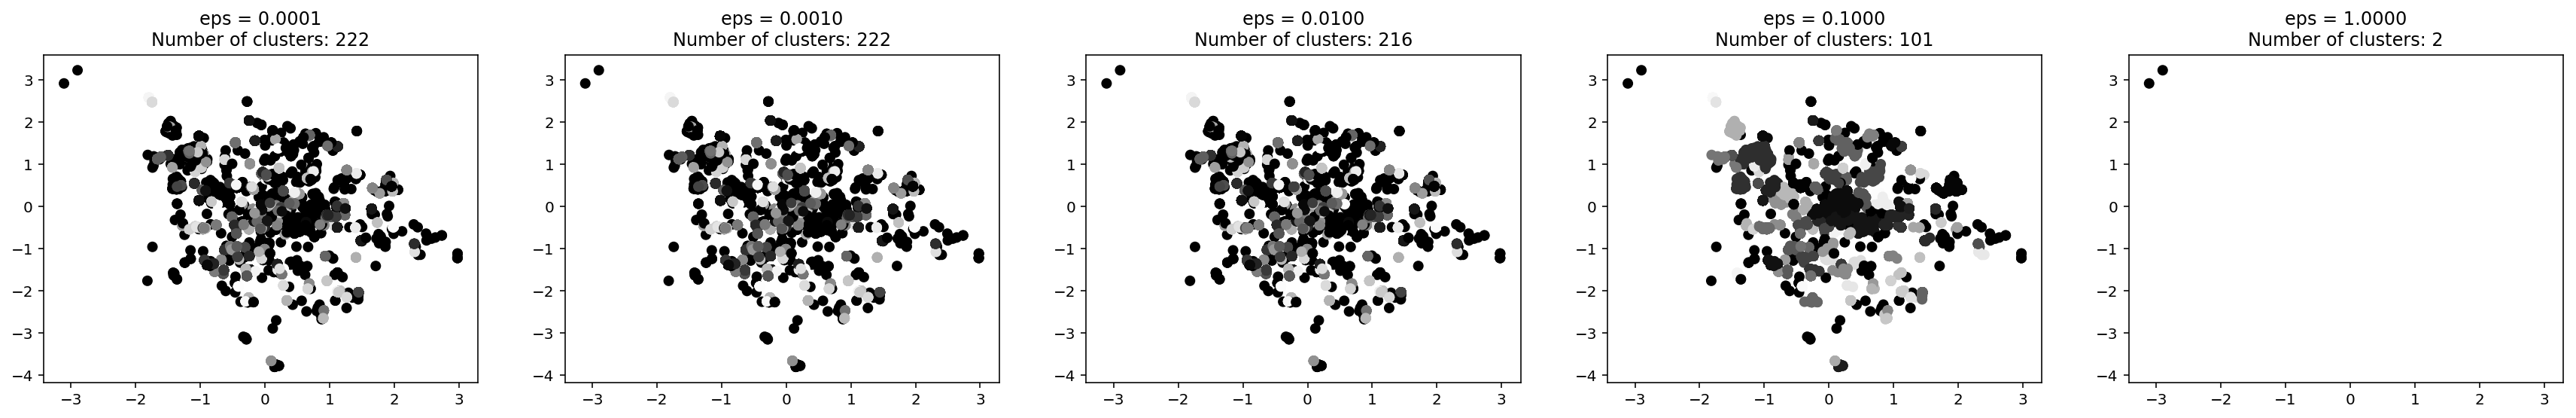

In [78]:
fig, axes = plt.subplots(1, 5, figsize=(30, 4))
for ax, eps in zip(axes[0:], eps_list):
    # кластеризуем и выводим картинку
    algorithm = DBSCAN(eps =  eps)#, min_samples = 200)
    clusters = algorithm.fit_predict(df_sample)
    ax.scatter(df_sample['x'], df_sample['y'], c=clusters, cmap='gray')#, edgecolors='gray')
    ax.set_title("eps = {:.4f}\nNumber of clusters: {}".format(eps, len(np.unique(clusters))))

In [74]:
from collections import Counter

In [86]:
clusters = DBSCAN(eps=0.1).fit_predict(df_sample)
com_clusters = Counter(clusters).most_common(5)
clusters1 = [ 5 if x in [y[0] for y in com_clusters] else 10 for x in clusters ]
#print(clusters, clusters1)

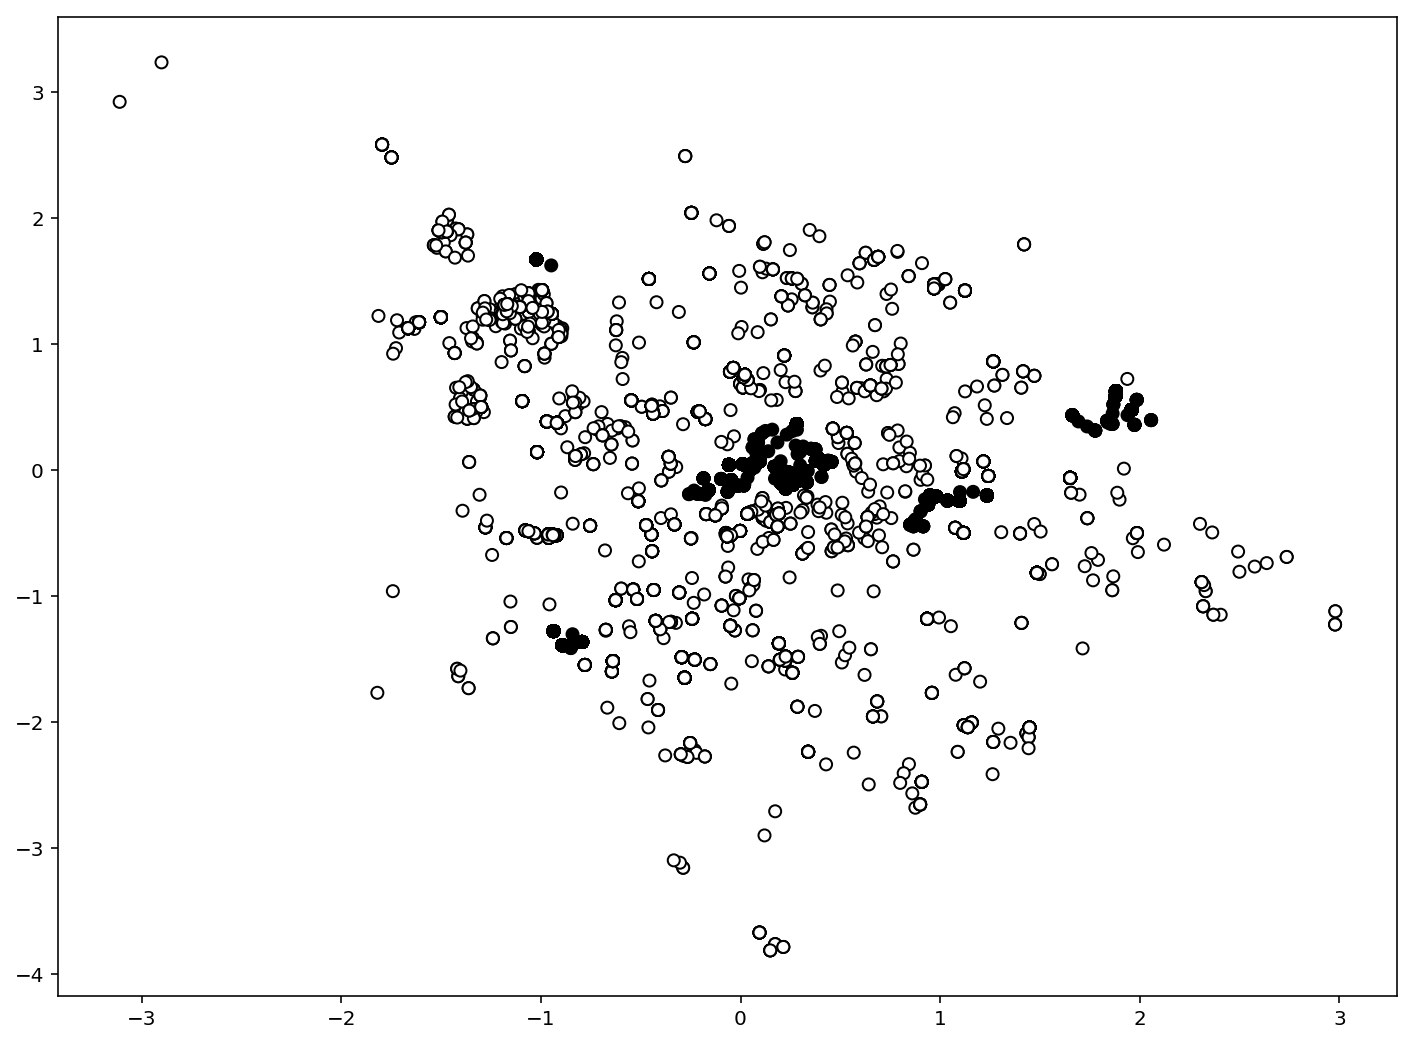

In [87]:
plt.scatter(df_sample['x'], df_sample['y'], c=clusters1, cmap='gray', edgecolors='black')